<a href="https://colab.research.google.com/github/EslamAsfour/Custom_DL_Framework-Project/blob/main/Lenet_Training_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Clone Github Repo


In [ ]:
!git clone https://EslamAsfour:@github.com/EslamAsfour/Custom_DL_Framework-Project.git  

Cloning into 'Custom_DL_Framework-Project'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 336 (delta 11), reused 16 (delta 6), pack-reused 313
Receiving objects: 100% (336/336), 563.26 KiB | 6.26 MiB/s, done.
Resolving deltas: 100% (193/193), done.


## 2) Change Directory then Create Logs Directory

In [ ]:
cd Custom_DL_Framework-Project/

/content/Custom_DL_Framework-Project


In [ ]:
mkdir Logs/

mkdir: cannot create directory ‘Logs/’: File exists


## 3) Import Needed Modules For Training

In [ ]:
import numpy as np
from modules.Layer import *
from modules.LOSS_FUNC import Cross_Entropy_Loss
from modules.Activation_Function import Relu,Softmax
from modules.Net import Net
from modules.PreProcessing_data import GetData

## 4) Use DataLoader to Download and Preprocess The Dataset

In [ ]:
X_train,y_train,X_test, y_test = GetData()

Loadind data......
- Download progress: 100%
Download finished.
- Download progress: 100%
Download finished.
- Download progress: 100%
Download finished.
- Download progress: 100%
Download finished.
Preparing data......


## 5) Create Net Object with the needed Architect 

In [ ]:
LeNet = Net(layers=[
                    Conv2D(in_Channels= 1,out_Channels = 6, Kernal_Size= 5, Padding=2  ,Stride= 1),
                    Relu(), 
                    MaxPool2D(kernel_size=2), 
                    Conv2D(in_Channels= 6,out_Channels = 16, Kernal_Size= 5, Padding=0  ,Stride= 1),
                    Relu(),
                    MaxPool2D(kernel_size=2),
                    Conv2D(in_Channels= 16,out_Channels = 120, Kernal_Size= 5, Padding=0  ,Stride= 1),
                    Relu(),
                    Flatten(),
                    FullyConnectedLayer(input_dim= 120,output_dim=84),
                    Relu(),
                    FullyConnectedLayer(input_dim=84,output_dim=10),
                    ], loss=Cross_Entropy_Loss())


In [ ]:
pwd

'/content/Custom_DL_Framework-Project'

In [ ]:
path = "/content/Custom_DL_Framework-Project/Logs/Weights_(1)_(700).pkl"
LeNet.load_weights(path)

## 6) Start Training Loop 

In [ ]:
n_epoch = 10
batch_size = 32
batch_num = 700
total_Num_Patch = int(X_train.shape[0]/batch_size)

for e in range(n_epoch):
    batch_num = 700
    for batch_index in range(700, X_train.shape[0], batch_size):
        batch_num +=1
        if batch_index + batch_size < X_train.shape[0]:
            end_Index =   batch_index+batch_size
            x = X_train[ batch_index : end_Index ]
            y = y_train[ batch_index : end_Index ]
            
        else :
            end_Index =   X_train.shape[0]
            x = X_train[batch_index : end_Index]
            y = y_train[batch_index: end_Index]
        
        # Forward Prop
        out = LeNet(x)
        # Calc Accuracy
        
        preds = np.argmax(out, axis=1).reshape(-1, 1)
        accuracy_per_Patch = ( preds == y ).sum() / batch_size
        accuracy_per_Patch = accuracy_per_Patch*100
        # Calc Loss
        loss = LeNet.loss(out, y)
        
        
        # Backward Prop
        LeNet.backward()
        LeNet.weights_update(alpha=1e-5)
        
        print("Epoch no. %d , Patch no. %d/%d , loss =  %2f4 \t accuracy per patch = %d %%" % ( e + 1, batch_num, total_Num_Patch  ,loss, accuracy_per_Patch ))
        
        #Every 100 Batches Save the weights
        if batch_num % 100 == 0 :
            LeNet.save_weights(e+1,batch_num)
            

Epoch no. 1 , Patch no. 701/1875 , loss =  0.1459734 	 accuracy per patch = 93 %
Epoch no. 1 , Patch no. 702/1875 , loss =  0.1612104 	 accuracy per patch = 93 %
Epoch no. 1 , Patch no. 703/1875 , loss =  0.2207654 	 accuracy per patch = 96 %
Epoch no. 1 , Patch no. 704/1875 , loss =  0.1120114 	 accuracy per patch = 96 %
Epoch no. 1 , Patch no. 705/1875 , loss =  0.6151954 	 accuracy per patch = 81 %
Epoch no. 1 , Patch no. 706/1875 , loss =  0.2735744 	 accuracy per patch = 90 %
Epoch no. 1 , Patch no. 707/1875 , loss =  0.3324774 	 accuracy per patch = 93 %
Epoch no. 1 , Patch no. 708/1875 , loss =  0.2621724 	 accuracy per patch = 90 %
Epoch no. 1 , Patch no. 709/1875 , loss =  0.2040694 	 accuracy per patch = 93 %
Epoch no. 1 , Patch no. 710/1875 , loss =  0.3506454 	 accuracy per patch = 81 %
Epoch no. 1 , Patch no. 711/1875 , loss =  0.2631034 	 accuracy per patch = 90 %
Epoch no. 1 , Patch no. 712/1875 , loss =  0.3759524 	 accuracy per patch = 90 %
Epoch no. 1 , Patch no. 713/

KeyboardInterrupt: ignored

In [ ]:
LeNet.load_weights()

FileNotFoundError: ignored

In [20]:
import cv2
import matplotlib.pyplot as plt

Loadind data......
Preparing data......
Image Number 100
LeNet Prediction is 6


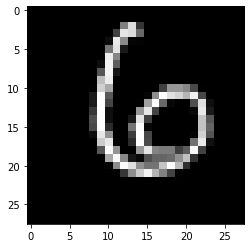

KeyboardInterrupt: ignored

In [25]:
path = "Logs/Weights_(1)_(1700).pkl"
LeNet.load_weights(path)


Training_data,Training_labels,Testing_data , Testing_labels = GetData()

while (1):
    No_ofImage =input("Image Number ")
    if (not No_ofImage.isdigit()):
        break
    No_ofImage = int(No_ofImage)
    Testing_image=Testing_data[No_ofImage]
    Testing_image =Testing_image.reshape((1,1,28,28))
    Image_labels=Testing_labels[No_ofImage]

    #Forwarding path
    out = LeNet(Testing_image)

    #prediction of our Lenet model
    preds = np.argmax(out, axis=1).reshape(-1, 1)

    #output our model prediction
    print("LeNet Prediction is {}".format(preds[0][0]))

    #showing image
    Testing_image=Testing_image.reshape(28,28)
    plt.imshow(Testing_image,cmap='gray')
    plt.show()

In [26]:

Classes_number = 10
Predictions = []

for image,label in zip (Testing_data ,Testing_labels):

    image =image.reshape((1,1,28,28))
    out = LeNet(image)  #output of forward path

    preds = np.argmax(out, axis=1).reshape(-1, 1) #prediction of our Lenet mode
    Predictions.append(preds[0][0])



def evaluation(No_of_classes,True_Label,Predicted_Label):
    
    confussion_matrix = np.zeros((No_of_classes,No_of_classes))
    True_Label=(True_Label.T)[0] 
    for TL,PL in zip(True_Label,Predicted_Label):
        confussion_matrix[TL][PL]=confussion_matrix[TL][PL]+1

    TP = np.zeros(No_of_classes)
    TN = np.zeros(No_of_classes)
    FP = np.zeros(No_of_classes)
    FN = np.zeros(No_of_classes)
    for i in range(No_of_classes):
        TP[i] = confussion_matrix[i][i]
    Matrix_sum = np.sum(confussion_matrix)
    raw_sum = np.sum(confussion_matrix, axis = 1) 
    column_sum = np.sum(confussion_matrix,axis = 0)
    for i in range(No_of_classes):
        TN[i]= Matrix_sum-(raw_sum[i]+column_sum[i])+confussion_matrix[i][i]
    for i in range(No_of_classes):
        FP[i]= column_sum[i]-confussion_matrix[i][i]
    for i in range(No_of_classes):
        FN[i]=raw_sum[i]-confussion_matrix[i][i]

    accurecy =  np.sum(TP)/Matrix_sum
    accurecy=round(accurecy,2)
    Precision = np.zeros(No_of_classes)

    for i in range(No_of_classes):
        Precision[i]=TP[i]/(TP[i]+FN[i])
        Precision[i]=round(Precision[i],2)
    Recall = np.zeros(No_of_classes)

    for i in range(No_of_classes):
        Recall[i] = TP[i]/(TP[i]+TN[i])
        Recall[i]=round(Recall[i],2)
    print("TP:",TP)
    print("TN:",TN)
    print("FP:",FP)
    print("FN",FN)
    print("acc:",accurecy)
    print("Per:",Precision)
    print("Rec:",Recall)
    precision_Avg = round(np.sum(Precision)/No_of_classes,2)
    Recall_Avg = round(np.sum(Recall)/No_of_classes,2)

    print("Avg precision",precision_Avg)
    print("Avg ReCall",Recall_Avg)



In [27]:
evaluation(Classes_number,Testing_labels,Predictions)

TP: [ 958. 1111.  945.  923.  919.  799.  923.  927.  882.  914.]
TN: [8957. 8837. 8894. 8906. 8965. 9023. 8970. 8934. 8898. 8917.]
FP: [ 63.  28.  74.  84.  53.  85.  72.  38. 128.  74.]
FN [ 22.  24.  87.  87.  63.  93.  35. 101.  92.  95.]
acc: 0.93
Per: [0.98 0.98 0.92 0.91 0.94 0.9  0.96 0.9  0.91 0.91]
Rec: [0.1  0.11 0.1  0.09 0.09 0.08 0.09 0.09 0.09 0.09]
Avg precision 0.93
Avg ReCall 0.09
